# STEP 1:  Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [2]:
#Loading Dataset
data = pd.read_csv(r"D:\UpGrad_BikeSharingCaseStudy\day.csv")

In [3]:
# Dropping unnecessary columns
data = data.drop(['instant','dteday','casual','registered'],axis=1)

In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [6]:
data.isnull().sum() # Checking for any null values

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [7]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: Data Visualisation

<Figure size 1440x1080 with 0 Axes>

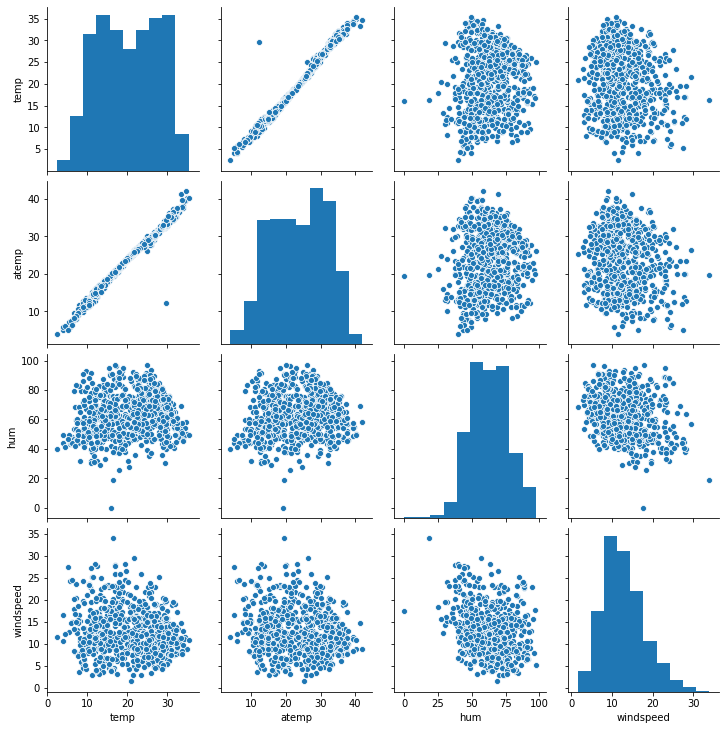

In [8]:
# visualising numeric variables
plt.figure(figsize=(20,15))
sns.pairplot(data=data,vars=['temp','atemp','hum','windspeed'])
plt.show()

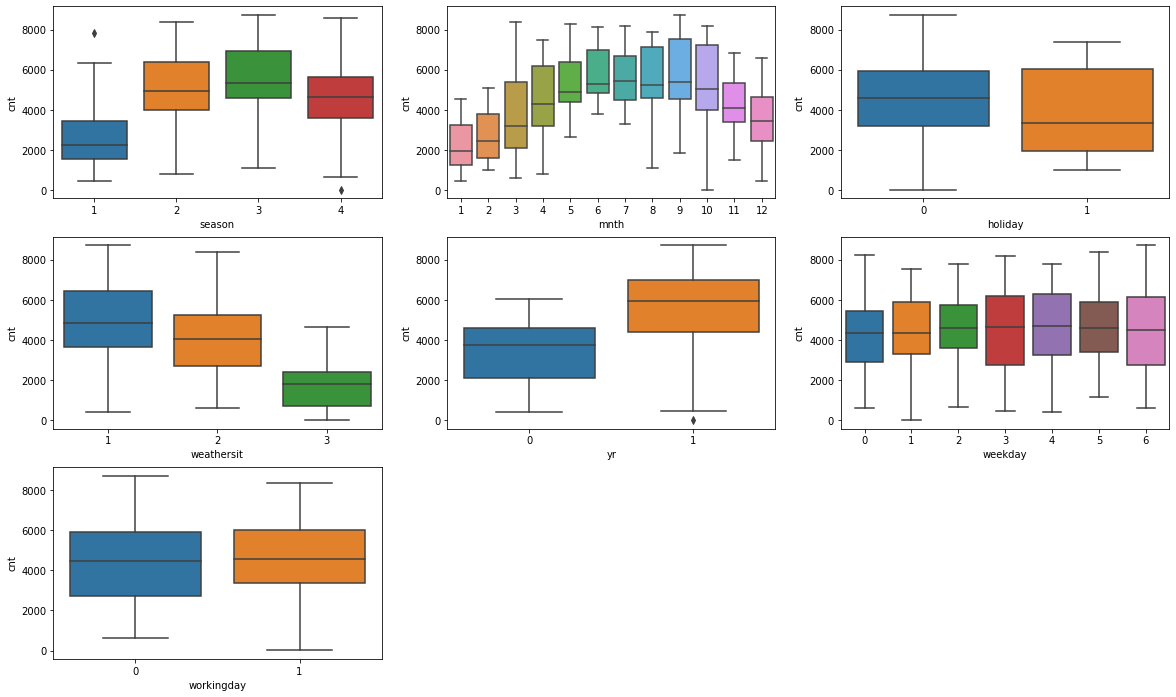

In [9]:
# visualising Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

# Step 3: Data Preparation

In [10]:
# Mapping to the necessary type
data.season=data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.mnth = data.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.weekday = data.weekday.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday',4:'thrusday',5:'friday',6:'saturday'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})

In [11]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Creating dummies for these columns
dummies = pd.get_dummies(data[['season','mnth','weekday','weathersit']],drop_first=True)

In [13]:
#Concatenating the dummies and data
data = pd.concat([dummies,data],axis=1)

In [14]:
data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#Dropping these columns as dummies are created for these columns
data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace = True)

In [16]:
data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Rain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
data.shape

(730, 30)

# Step 4: Splitting the Data into Training and Testing Sets


In [18]:
# Splitting into training and testing sets
train,test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)


In [19]:
train.shape

(510, 30)

In [20]:
test.shape

(219, 30)

In [21]:
data.shape

(730, 30)

# Step 5 :Rescaling the Features

In [22]:
# Re-scaling the columns using Normalisation
scaler = MinMaxScaler()
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [23]:
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Rain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [24]:
train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Rain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


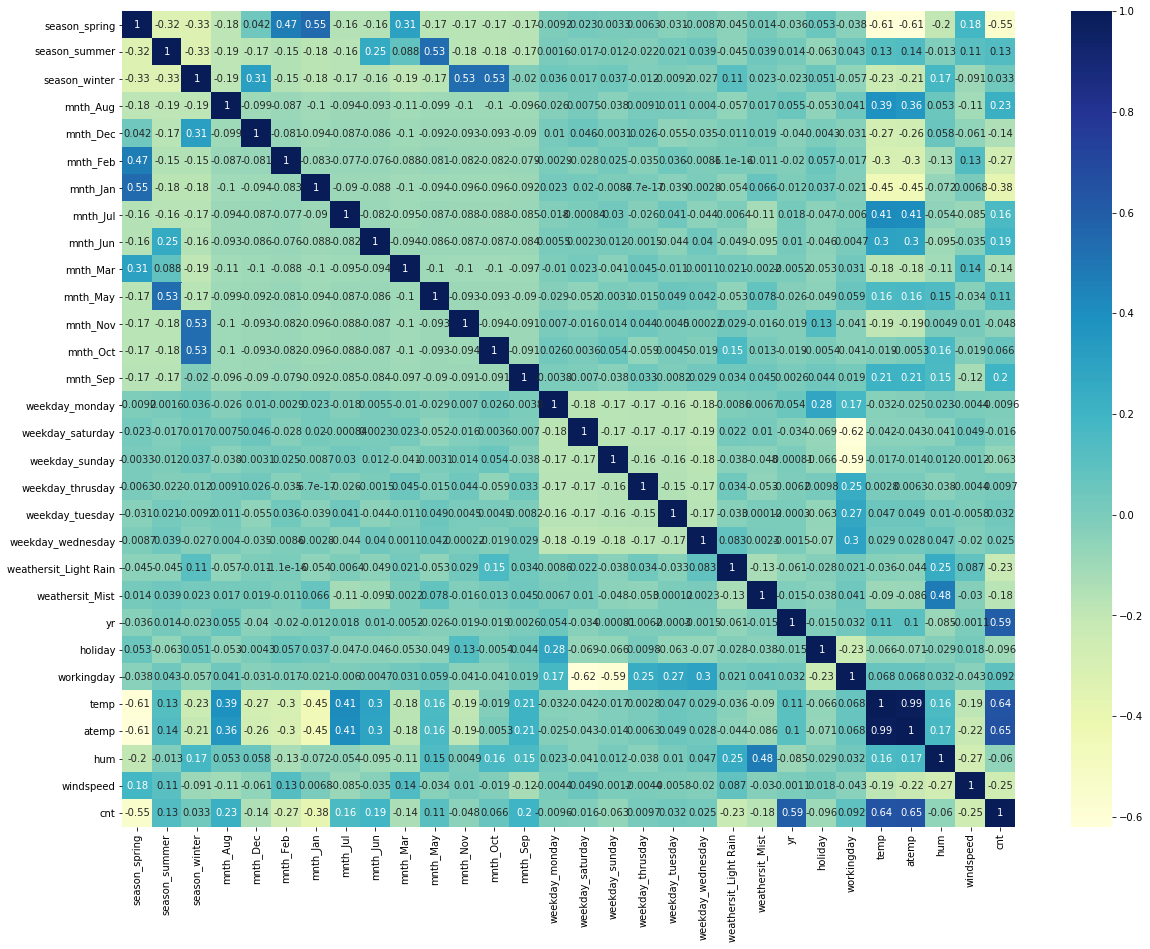

In [25]:
# Plotting heatmap for better visualisation of the columns
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [26]:
# Dividing the data into X_train and y_train
y_train = train.pop('cnt')
X_train = train

# Step 6: Building a linear model


In [27]:
# Building a LinearRegression model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE with output variable as 13
rfe = rfe.fit(X_train, y_train)

In [28]:
# Making a list for better understanding
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 17),
 ('mnth_Sep', True, 1),
 ('weekday_monday', False, 11),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 10),
 ('weekday_thrusday', False, 13),
 ('weekday_tuesday', False, 12),
 ('weekday_wednesday', False, 14),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

# Starting with all the columns selected by RFE


MODEL-1

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_saturday', 'weathersit_Light Rain',
       'weathersit_Mist', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]


Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_monday', 'weekday_sunday',
       'weekday_thrusday', 'weekday_tuesday', 'weekday_wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [31]:
X_train_rfe = X_train[col]


In [32]:
X_train_rfe = sm.add_constant(X_train_rfe)
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()
# Check the parameters obtained

lm.params

const                    0.279640
season_spring           -0.056290
season_summer            0.052092
season_winter            0.098387
mnth_Jul                -0.057853
mnth_Sep                 0.082751
weekday_saturday         0.017490
weathersit_Light Rain   -0.239456
weathersit_Mist         -0.054750
yr                       0.229791
holiday                 -0.094469
temp                     0.530609
hum                     -0.168105
windspeed               -0.183143
dtype: float64

In [33]:
print(lm.summary()) # Checking Summary


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.51e-190
Time:                        11:38:40   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [34]:
X_train_new = X_train_rfe.drop(["weekday_saturday"], axis = 1)


MODEL-2

In [35]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.69e-190
Time:                        11:38:41   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2841      0.034      8.242      0.000       0.216       0.352
season_spring            -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_summer             0.0519      0.015      3.457      0.001       0.022       0.081
season_winter             0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                 -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                  0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                        0.2293      0.008     28.219      0.000       0.213       0.245
holiday                  -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                      0.5300      0.034     15.739      0.000       0.464       0.596
hum                      -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking VIF for multicollinearity

In [36]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
1,season_spring,5.02
10,temp,3.61
3,season_winter,3.49
2,season_summer,2.61
11,hum,1.90
7,weathersit_Mist,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Rain,1.24


In [37]:
X_train_new = X_train_new.drop(['const'], axis=1)


In [38]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_spring,4.01
2,season_winter,3.35
1,season_summer,2.78
6,weathersit_Mist,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


MODEL-3(FINAL)

In [39]:
X_train_new = X_train_new.drop(['hum'], axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.40e-187
Time:                        11:38:41   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [40]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_summer,2.21
0,season_spring,2.08
7,yr,2.07
2,season_winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist,1.55
4,mnth_Sep,1.34
5,weathersit_Light Rain,1.08


# Step 7: Residual Analysis of the train data


Text(0.5, 0, 'Errors')

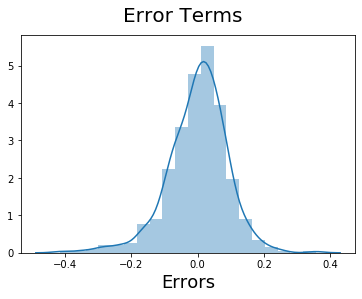

In [41]:
y_train_cnt = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 8: Making Predictions Using the Final Model


In [42]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])
test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Rain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [43]:
y_test = test.pop('cnt')
X_test = test
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   season_spring          219 non-null    uint8  
 2   season_summer          219 non-null    uint8  
 3   season_winter          219 non-null    uint8  
 4   mnth_Jul               219 non-null    uint8  
 5   mnth_Sep               219 non-null    uint8  
 6   weathersit_Light Rain  219 non-null    uint8  
 7   weathersit_Mist        219 non-null    uint8  
 8   yr                     219 non-null    int64  
 9   holiday                219 non-null    int64  
 10  temp                   219 non-null    float64
 11  windspeed              219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [44]:
y_pred = lm.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8049418440982381

In [46]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009264444750858143

# Step 9: Model Evaluation


Text(0, 0.5, 'y_pred')

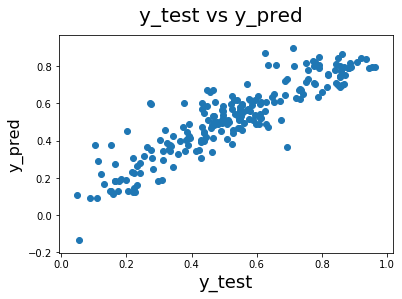

In [47]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [48]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_winter,0.083084
5,mnth_Sep,0.076686
2,season_summer,0.045280
4,mnth_Jul,-0.052418
1,season_spring,-0.066942
7,weathersit_Mist,-0.081558


We can see that the equation of our best fitted line is:

cnt =  0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X season_winter + 0.076686 X mnth_Sep + 0.045280 X season_summer
       - 0.052418 X mnth_Jul - 0.066942 X season_spring - 0.081558 X weathersit_Mist & Cloudy
       - 0.098013 X holiday - 0.147977 X windspeed - 0.285155 X weathersit_Light Snow & Rain

- Positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value   of cnt.
- Negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
- Temp is the most significant with the largest coefficient,Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays
- This indicates that the bike rentals is majorly affected by temperature,season and month.